In [1]:
#We are going to use iris dataset in this example
from sklearn.datasets import load_iris

In [2]:
#We will use pandas to handle the data
import pandas as pd
dataset = load_iris()
X = pd.DataFrame(dataset.data,columns=dataset.feature_names)
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
dataset.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
y = pd.Series(dataset.target,name='Iris_Breed')
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Iris_Breed, dtype: int32

In [7]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=0)

In [8]:
#Training the model
model.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

[Text(167.4, 199.32, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(193.15384615384616, 163.07999999999998, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(103.01538461538462, 126.83999999999999, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(51.50769230769231, 90.6, 'petal width (cm) <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]\nclass = versicolor'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(154.52307692307693, 90.6, 'petal width (cm) <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(

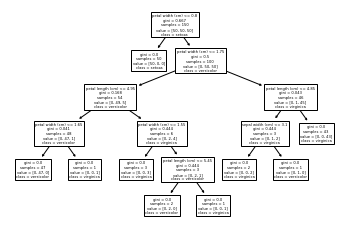

In [11]:
#Plotting the trained Decision Tree
from sklearn.tree import plot_tree
plot_tree(model, feature_names=X.columns, class_names=dataset.target_names)

The Decision Tree looks complicated as there are some leaf nodes with only one sample datapoint. This is a sign of over-fitting. We should reduce the complexity of the tree to handle this. Thresholding on the maximum depth is a great criterion to do this. 

We will now look into different max_depth values and their corresponding k-fold scores to find out the ideal max_depth for this dataset. 

In [13]:
from sklearn.model_selection import cross_val_score
scores = []
for i in range(1,11,1):
    model = DecisionTreeClassifier(max_depth=i,random_state=0)
    kfold_score = cross_val_score(model, X, y, cv = 5).mean()
    scores.append(kfold_score)

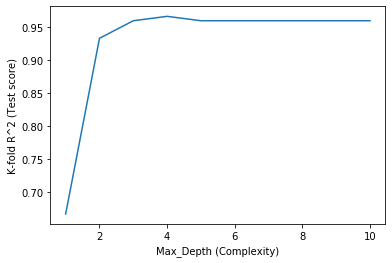

In [14]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('Max_Depth (Complexity)')
plt.ylabel('K-fold R^2 (Test score)')
plt.show()

In [15]:
scores

[0.6666666666666666,
 0.9333333333333332,
 0.96,
 0.9666666666666668,
 0.9600000000000002,
 0.9600000000000002,
 0.9600000000000002,
 0.9600000000000002,
 0.9600000000000002,
 0.9600000000000002]

The figure above shows at a maximum depth of 3 or 4, the model peaks the k-fold score and we should not go beyond this to over-complicate the tree. So I'll train a Decision Tree with max-depth 3 on this data set.

[Text(125.55000000000001, 190.26, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]\nclass = setosa'),
 Text(83.7, 135.9, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]\nclass = setosa'),
 Text(167.4, 135.9, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]\nclass = versicolor'),
 Text(83.7, 81.53999999999999, 'petal length (cm) <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]\nclass = versicolor'),
 Text(41.85, 27.180000000000007, 'gini = 0.041\nsamples = 48\nvalue = [0, 47, 1]\nclass = versicolor'),
 Text(125.55000000000001, 27.180000000000007, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(251.10000000000002, 81.53999999999999, 'petal length (cm) <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]\nclass = virginica'),
 Text(209.25, 27.180000000000007, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(292.95, 27.180000000000007, 'gini = 0.0\nsamples = 43\nvalue = [0, 0, 43]

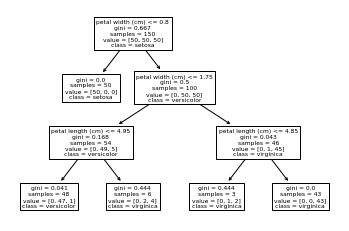

In [17]:
model = DecisionTreeClassifier(max_depth=3,random_state=0)
model.fit(X,y)
plot_tree(model, feature_names=X.columns, class_names=dataset.target_names)

In [21]:
'''
As shown by the Decision tree, an iris plant with petal length(X_3) 
of 3.8 cm and petal width(X_2) of 1.5 should be predicted as 
versicolor(y=1)

'''
#Pedicting a test point
dataset.target_names[model.predict([[0,0,3.8,1.5]])[0]]

'versicolor'